<a href="https://colab.research.google.com/github/ZZISST/data-visualisation-methods/blob/main/%D0%9C%D0%95%D0%92%D0%94_%D0%9B%D0%A02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи


**Цель работы:** изучение основных способов визуализации табличных данных с помощью модулей `seaborn`, `plotly`, `altair`, `bokeh`.

**Краткое описание:** в лабораторной работе представлено 10 заданий на построение графиков разных видов. В каждом задании указано, каким видом графика стоит воспользоваться для визуализации данных. По каждому заданию необходимо построить график дважды: первый раз с помощью модуля `seaborn` (альтернативно можно `matplotlib` со стилями из `seaborn`), второй – с помощью `plotly`, `altair` или `bokeh` на выбор студента. Необязательно каждый раз для второго графика выбирать одну и ту же библиотеку, т.к. не все библиотеки располагают одинаковым набором графиков.

# Данные


По [ссылке](https://drive.google.com/drive/folders/1e0E4vQzaE9LBZgfzz0AzsyAXgtH0eMaP?usp=share_link) расположена таблица с информацией о песнях, исполненных на Евровидении с 2009 по 2023 год. Все задания лабораторной работы необходимо выполнять по этим данным. Данные в полном объеме можно найти [по ссылке](https://www.kaggle.com/datasets/diamondsnake/eurovision-song-contest-data).

##### **Формат данных**

```
year,country,artist_name,song_name,language,style,gender,main_singers,key,BPM,energy,danceability,happiness,loudness,acousticness,instrumentalness,liveness,speechiness,final_place
2023,Norway,Alessandra,Queen of Kings,English,Pop,Female,1,E Minor,110,36,64,23,10 dB,58,0,10,3,5
2023,Malta,The Busker,Dance (Our Own Party),English,Pop,Male,1,F Minor,103,78,70,82,6 dB,2,0,18,4,
...
```
##### **Описание полей**

- ```year``` – год;
- ```country``` – страна участника;
- ```artist_name``` – исполнитель;
- ```song_name``` – название песни;
- ```language``` – язык, на котором исполняется песня;
- ```style```	– жанр;
- ```gender``` – пол участника;
- ```main_singers``` – количество вокалистов;
- ```key```	– регистр (высота тона);
- ```BPM``` – скорость композиции в целом (количество четвертых нот в минуту);
- ```energy``` – энергичность композиции;
- ```danceability``` – танцевальность (насколько трек подходит для танцев);
- ```happiness``` – жизнерадостность;
- ```loudness``` – громкость;
- ```acousticness``` – акустичность;
- ```instrumentalness``` – инструментальность;
- ```liveness``` – живость;
- ```speechiness``` – насколько много текста;
- ```final_place``` – место в фонале.

# Практические задания

>По каждому заданию должен быть сделан вывод. Также нужно обязательно добавлять подпись графика и осей.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/data_visualisation/song_data.csv")
sample = df.sample(5, random_state=42)
sample

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,year,country,artist_name,song_name,language,style,gender,main_singers,key,BPM,energy,danceability,happiness,loudness,acousticness,instrumentalness,liveness,speechiness,final_place
538,2009,Portugal,Flor-de-Lis,Todas as ruas do amor,Portuguese,Traditional,Female,1,G Major,95,70,50,33,5 dB,34,0,12,3,15.0
523,2009,Montenegro,Andrea Demirovic,Just Get Out of My Life,English,Pop,Female,1,G Minor,138,91,56,56,3 dB,2,0,66,5,NaN
234,2017,Estonia,Koit Toome and Laura,Verona,English,Pop,Mix,2,D Minor,111,82,61,29,4 dB,1,0,35,3,NaN
524,2009,Czech Republic,Gipsy.cz,Aven Romale,"English, Romani",Traditional,Male,1,Bb Minor,154,84,80,69,7 dB,20,0,23,46,NaN
486,2010,Estonia,Malcolm Lincoln,Siren,English,Pop,Male,1,-,-,-,-,-,NaN,-,-,-,-,NaN


## Задание 1

Проведите предобработку числовых значений в датасете:
1. В столбцах `BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness` замените отсутствующие значения и прочерки на 0.
2. В столбце `loudness` оставьте только число без единиц измерения.
3. Во всех перечисленных в пунктах 1 и 2 столбцах преобразуйте значения в тип данных `float`.

In [7]:
# Replace missing values and dashes with 0 in specified columns
columns_to_clean = ['BPM', 'energy', 'danceability', 'happiness', 'acousticness',
                    'instrumentalness', 'liveness', 'speechiness']
for col in columns_to_clean:
    df[col] = df[col].replace('-', 0).fillna(0)

# Extract number from loudness (remove 'dB') and convert to float
df['loudness'] = df['loudness'].str.replace(' dB', '').replace('-', 0).astype(float)

# Convert specified columns to float
for col in columns_to_clean + ['loudness']:
    df[col] = df[col].astype(float)

print(df[columns_to_clean + ['loudness']])

       BPM  energy  danceability  happiness  acousticness  instrumentalness  \
0    110.0    36.0          64.0       23.0          58.0               0.0   
1    103.0    78.0          70.0       82.0           2.0               0.0   
2    103.0    70.0          56.0       11.0           4.0               2.0   
3    160.0    55.0          56.0       40.0           5.0               0.0   
4    145.0    63.0          66.0       77.0          31.0               0.0   
..     ...     ...           ...        ...           ...               ...   
560   92.0    58.0          26.0       23.0          55.0               0.0   
561  130.0    94.0          64.0       45.0          41.0               0.0   
562  136.0    89.0          62.0       56.0          11.0               0.0   
563  105.0    31.0          30.0       12.0           1.0              79.0   
564  126.0    70.0          69.0       87.0           1.0              73.0   

     liveness  speechiness  loudness  
0        10.

## Задание 2

Покажите, какие характеристики музыки (`BPM`, `energy`, `danceability`, `happiness`, `acousticness`, `instrumentalness`, `liveness`, `speechiness`) коррелируют между собой. Для визуализации используйте диаграмму `heatmap`.

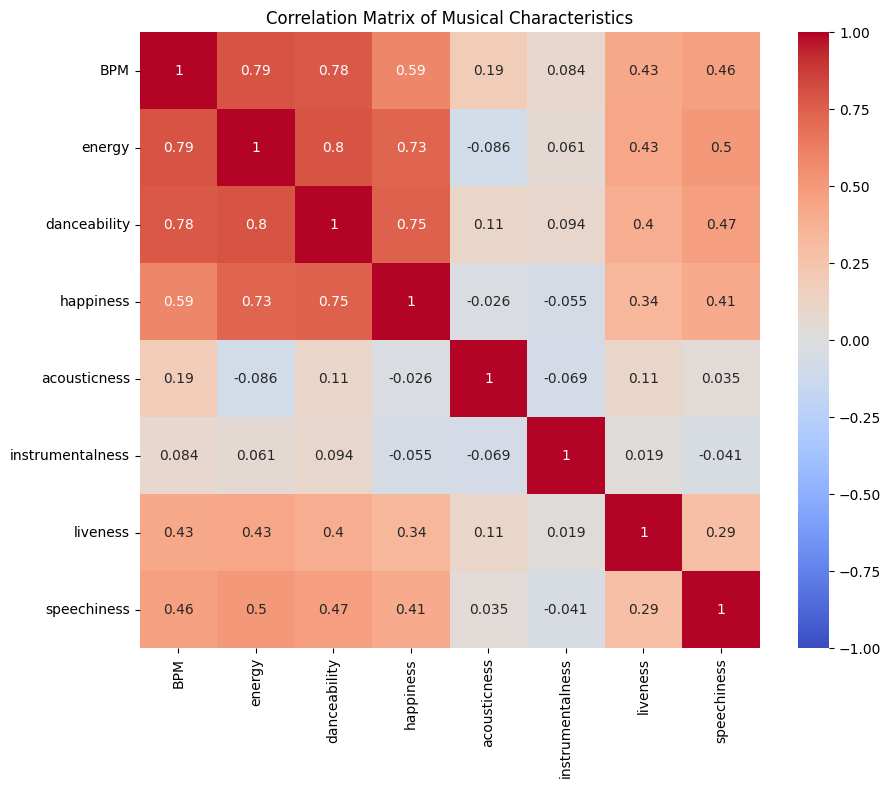

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['BPM', 'energy', 'danceability', 'happiness', 'acousticness',
                'instrumentalness', 'liveness', 'speechiness']].corr(),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляции музыкальных характеристик')
plt.show()

## Задание 3

Покажите на диаграмме разброса взаимосвязь между жизнерадостностью (`happiness`) и энергичностью (`energy`) композиции. Добавьте на диаграмму вспомогательные элементы (отметку средних значений, выбросов) для упрощения интерпретации визуализации.



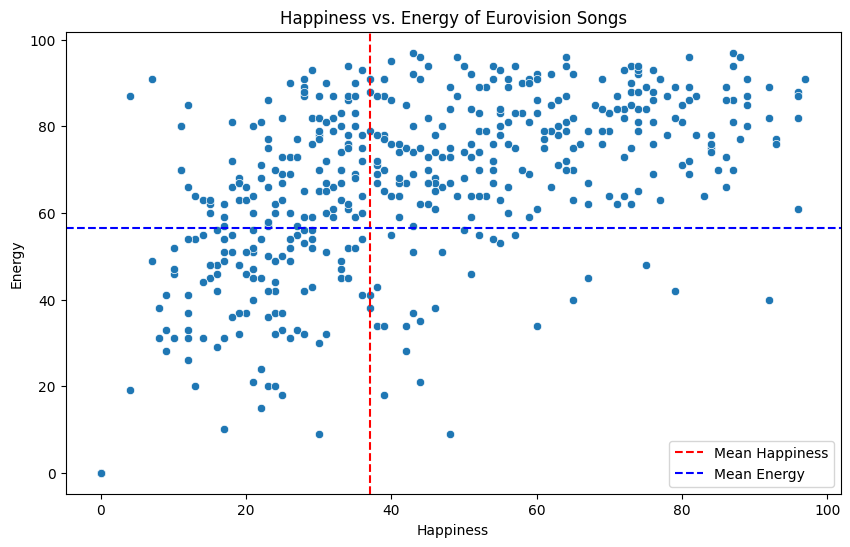

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='happiness', y='energy')
plt.axvline(df['happiness'].mean(), color='red', linestyle='--', label='Mean Happiness')
plt.axhline(df['energy'].mean(), color='blue', linestyle='--', label='Mean Energy')
plt.title('Жизнерадостность против энергичности песен Евровидения')
plt.xlabel('Жизнерадостность')
plt.ylabel('Энергичность')
plt.legend()
plt.show()

## Задание 4

Покажите на горизонтальной столбчатой диаграмме распределение количества треков по жанрам. Отсортируйте диаграмму по убыванию количества композиций в жанре. Выделите контрастным цветом жанр, в котором больше всего песен.

In [10]:
genre_counts = df['style'].value_counts().sort_values(ascending=True)
colors = ['grey' if genre != genre_counts.idxmax() else 'red' for genre in genre_counts.index]
fig = px.bar(x=genre_counts.values, y=genre_counts.index, orientation='h',
             title='Кол-во треков определенного жанра',
             labels={'x': 'Кол-во', 'y': 'Жанр'})
fig.update_traces(marker_color=colors)
fig.show()

## Задание 5

Покажите на круговой диаграмме страны, участники из которых побеждали чаще других, и в каких годах они выигрывали. Диаграмма должна быть одна.

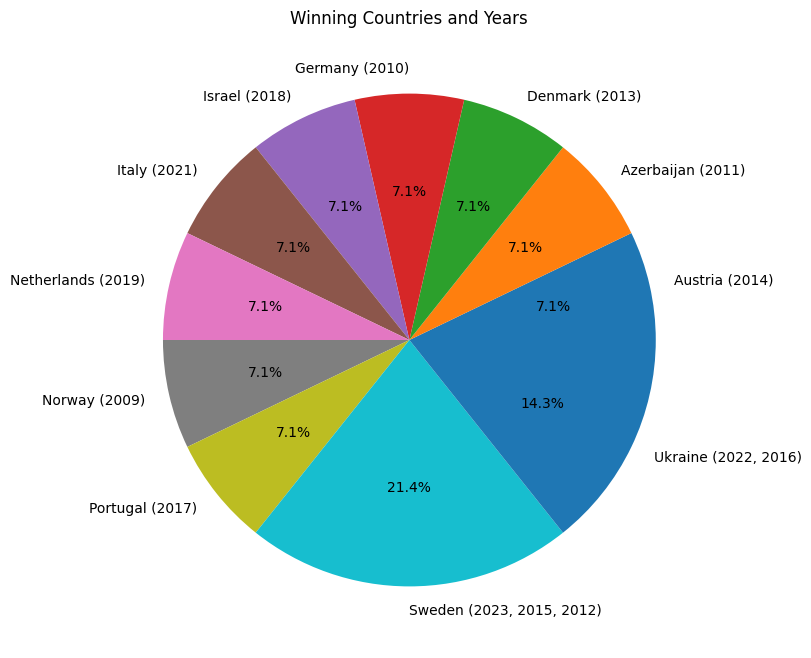

In [11]:
winners = df[df['final_place'] == 1][['country', 'year']].groupby('country').agg(list).reset_index()
winners['label'] = winners.apply(lambda x: f"{x['country']} ({', '.join(map(str, x['year']))})", axis=1)
plt.figure(figsize=(10, 8))
plt.pie(winners['year'].apply(len), labels=winners['label'], autopct='%1.1f%%')
plt.title('Winning Countries and Years')
plt.show()

## Задание 6

На вертикальной столбчатой диаграмме с группировкой покажите количество мужчин и женщин среди участников в каждом году, представленном в датасете.

In [12]:
fig = px.histogram(df, x='year', color='gender', barmode='group',
                   title='Количество участников мужского и женского пола по годам',
                   labels={'year': 'Год', 'count': 'Кол-во'})
fig.update_layout(xaxis_tickangle=45)
fig.show()

## Задание 7

Постройте график плотности распределения данных в столбце `danceability` (танцевальность), сгруппированных по категориям жанрам.

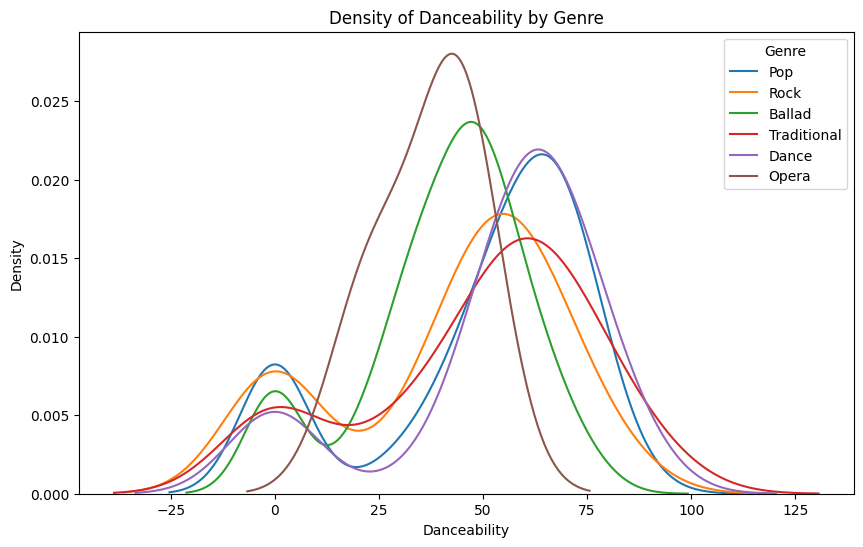

In [13]:
plt.figure(figsize=(10, 6))
for genre in df['style'].unique():
    sns.kdeplot(data=df[df['style'] == genre], x='danceability', label=genre)
plt.title('Плотность танцевальности по жанрам')
plt.xlabel('Танцевальность (эмм)')
plt.ylabel('Плотность')
plt.legend(title='Жанр')
plt.show()

## Задание 8

Покажите на ящиковой диаграмме взяимосвязь позиции в финальном рейтинге со страной. Итоги каких стран похожи между собой?

In [17]:
fig = px.box(df, x='country', y='final_place',
             title='Окончательное распределение мест по странам',
             labels={'country': 'Страна', 'final_place': 'Последнее место'})
fig.update_layout(xaxis_tickangle=90)
fig.show()

## Задание 9

Покажите на карте количество раз, когда каждая страна датасета проходила в финал.

In [15]:
final_counts = df[df['final_place'].notna()]['country'].value_counts().reset_index()
final_counts.columns = ['country', 'count']
fig = px.choropleth(final_counts, locations='country', locationmode='country names',
                    color='count', title='Количество финальных появлений по странам',
                    labels={'count': 'Количество финалов'})
fig.show()

## Задание 10

Покажите на диаграмме вида `treemap`, сколько раз каждая страна входила в топ-3 победителей.

*В `seaborn` нет такого типа графика, с помощью этого модуля строить график не нужно.*

In [16]:
top3 = df[df['final_place'].isin([1, 2, 3])]['country'].value_counts().reset_index()
top3.columns = ['country', 'count']
fig = px.treemap(top3, path=['country'], values='count',
                 title='Количество мест в тройке лидеров по странам')
fig.show()

# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения 10 заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой построение визуализации по данным из лабораторной работы, по сложности аналогичной тем, что требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. Покажите на ящиковой диаграмме распределение танцевальности для каждого жанра. Выполните с помощью `seaborn`.
2. На круговой диаграмме покажите исполнителей, которые участвовали больше одного раза и какие места они занимали. Выполните с помощью `plotly`.
3. Покажите на диаграмме вида `treemap`, сколько раз каждая страна проходила в финал. Выполните с помощью `plotly`.

# Дополнительные материалы

1. seaborn: statistical data visualization [Электронный ресурс]. URL: https://seaborn.pydata.org/ (дата обращения: 01.04.2024).
2. Plotly Open Source Graphing Libraries [Электронный ресурс]. URL: https://plotly.com/graphing-libraries/ (дата обращения: 01.04.2024).
3. Vega-Altair: Declarative Visualization in Python [Электронный ресурс]. URL: https://altair-viz.github.io/index.html (дата обращения: 01.04.2024).